In [417]:
import pandas as pd

### V2 changelog
- Calculated YC start date from batch. Now I only at deals that were less than 2 years since YC round start.  
- Improved tables join on name 985 rows -> 1190 rows   
- Tried to predict '% Acquired' but there was not enougth data (after all preprocessing there was ~ 150 non null records)
- Added number of investors to features
- Added standartization for numeric features
- Changed inference function to display company info more clearly

In [418]:
YEARS_TO_CONSIDER = 2

In [419]:
import pandas as pd
from IPython.display import display
import re

pd.options.display.max_columns = 100

def simplify_name(name):
    name = name.lower()
    name = re.sub('\(.*\)', '', name).strip()
    name = re.sub('\W', '', name).strip()
    return name


data = pd.read_csv("../YCombinator 2006-2023.csv")
data['name'] = data['Companies'].map(simplify_name)
display(data)

,xid,#,Companies,Company ID,Deal ID,Deal Date,Announced Date,Deal Size,Pre-money Valuation,Post Valuation,% Acquired,Price per Share,Debt Raised in Round,Raised to Date,Deal Class,Deal Type,Deal Size Status,Post Valuation Status,Investors,New Investors,Lead/Sole Investors,Employees,Revenue Growth since last debt deal,Revenue,EBITDA,Total Debt (from financials),Deal Synopsis,Financing Status Note,CEO (at time of deal),CEO PBId,name
0,48635,48386,Parakey (Software Development Applications),52732-99,19117-54T,17/11/2006 00:00,NaN,1.56,13.27,14.83,0.1054,1.47,NaN,1.56,Venture Capital,Early Stage VC,Actual,Actual,"{'42715-09': 'Baseline Ventures', '10521-55': ...","Baseline Ventures, DFO Management, O'Reilly Al...",NaN,NaN,NaN,NaN,NaN,NaN,The company raised $1.56 million of Series A f...,The company was acquired by Facebook (NASDAQ: ...,{'62492-86P': 'Blake Ross'},62492-86P,parakey
1,58836,58587,Snaptalent,61729-75,32010-85T,01/01/2008 00:00,NaN,2.00,4.03,6.03,0.3316,0.40,NaN,2.00,Venture Capital,Seed Round,Actual,Actual,"{'51007-51': 'Betaworks', '42715-00': 'Felicis...","Betaworks, Felicis, Index Ventures, Saul Klein...",NaN,NaN,NaN,NaN,NaN,NaN,The company joined Y Combinator as part of the...,The company is no longer actively in business ...,NaN,NaN,snaptalent
2,60141,59892,FriendFeed,41728-33,19653-94T,25/02/2008 00:00,NaN,5.00,NaN,NaN,NaN,NaN,NaN,5.00,Venture Capital,Early Stage VC,Actual,NaN,"{'11133-01': 'Benchmark (San Francisco)', '404...","Benchmark (San Francisco), Y Combinator",NaN,NaN,NaN,NaN,NaN,NaN,The company raised $5 million of Series A vent...,The company was acquired by Facebook for $50 m...,{'167058-55P': 'Jim Norris'},167058-55P,friendfeed
3,64785,64536,RescueTime,52794-46,135800-20T,23/09/2008 00:00,NaN,0.90,NaN,NaN,NaN,NaN,NaN,0.92,Venture Capital,Seed Round,Actual,NaN,{'106007-68': 'Christopher Sacca (Christopher ...,"Christopher Sacca, Michael Seckler, Mike Koss,...",NaN,NaN,NaN,NaN,NaN,NaN,"The company raised $900,000 of seed funding fr...","True Ventures, Y Combinator, Lowercase Capital...",{'43621-03P': 'Brian Fioca'},43621-03P,rescuetime
4,66671,66422,CarWoo,51122-80,18676-81T,01/01/2009 00:00,NaN,1.93,2.69,4.62,0.4181,0.18,NaN,2.03,Venture Capital,Seed Round,Actual,Actual,"{'50987-89': 'Accelerator Ventures', '11127-25...","Accelerator Ventures, Blumberg Capital, Comcas...",NaN,NaN,NaN,NaN,NaN,NaN,The company raised $1.9 million of seed fundin...,The company is no longer actively in business ...,{'38143-27P': 'Robert McClung'},38143-27P,carwoo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,314141,313892,Reflex (Software Development Applications),520530-40,223029-82T,02/08/2023 00:00,NaN,5.00,NaN,NaN,NaN,NaN,NaN,5.50,Venture Capital,Seed Round,Actual,NaN,"{'179440-93': 'Abstract Ventures', '11229-04':...","Abstract Ventures, Lux Capital, Outset Capital...",{'11229-04': 'Lux Capital'},NaN,NaN,NaN,NaN,NaN,The company raised $5 million of seed funding ...,The company raised $5 million of seed funding ...,{'336293-83P': 'Nikhil Rao'},336293-83P,reflex
1343,314262,314013,MindsDB,223449-22,212197-42T,08/08/2023 00:00,07/02/2023 00:00,46.50,NaN,NaN,NaN,6.65,NaN,55.24,Venture Capital,Early Stage VC,Actual,NaN,{'11133-01': 'Benchmark (San Francisco) (Cheta...,"Benchmark (San Francisco), Christopher Golda, ...",{'11133-01': 'Benchmark (San Francisco) (Cheta...,NaN,NaN,NaN,NaN,NaN,The company raised $46.5 million of Series A v...,The company raised $46.5 million of Series A v...,{'100780-12P': 'Jorge Torres'},100780-12P,mindsdb
1344,314273,314024,Daybreak Health,434212-21,233351-02T,08/08/2023 00:00,NaN,13.00,52.00,65.00,0.2000,2.63,NaN,24.95,Venture Capital,Early Stage VC,Actual,Actual,"{'11333-26': 'Lightspeed Venture Partners', '1...","Lux Capital, Union Square Ventures",{'11323-45': 'Union Square Ventures'},NaN,NaN,NaN,NaN,NaN,The company raised $13 million of Series B ven...,The company raised $13 million of Series B ven...

In [420]:
data_scrapped = pd.read_csv("../../yc_company_scraper/data/yc_essential_data.csv")
data_scrapped['name'] = data_scrapped['name'].map(simplify_name)

pd.options.display.max_columns = 50
display(data_scrapped)

,id,name,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,tags_highlighted,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,app_video_public,demo_day_video_public,app_answers,question_answers,objectID
0,370,wufoo,wufoo,[],https://bookface-images.s3.amazonaws.com/small...,http://wufoo.com,"Tampa, FL, USA",Wufoo is a web application that helps anybody ...,Online form builder.,11.0,False,False,False,B2B,B2B -> Marketing,1326791647,"[""SaaS"", ""Productivity""]",[],False,False,False,False,W06,Acquired,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,370
1,369,projectwedding,project-wedding,[],/company/thumb/missing.png,http://projectwedding.com,"Bethesda, MD, USA","Finding wedding vendors is hard. In 2007, a co...",NaN,2.0,False,False,False,Consumer,Consumer -> Home and Personal,1326791644,[],[],False,False,False,False,W06,Acquired,"[""Consumer"", ""Home and Personal""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,369
2,367,clustrix,clustrix,[],https://bookface-images.s3.amazonaws.com/small...,http://clustrix.com,"San Francisco, CA, USA",Clustrix provides the leading scale-out relati...,NaN,51.0,False,False,False,B2B,B2B -> Infrastructure,1326791636,[],[],False,False,False,False,W06,Acquired,"[""B2B"", ""Infrastructure""]","[""United States of America"", ""America / Canada""]",Growth,False,False,NaN,False,367
3,366,inkling,inkling,[],/company/thumb/missing.png,http://inklingmarkets.com,"Chicago, IL, USA","Inkling, based in Chicago, Illinois, offers co...",NaN,11.0,False,False,False,B2B,B2B -> Finance and Accounting,1326791629,[],[],False,False,False,False,W06,Acquired,"[""B2B"", ""Finance and Accounting""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,366
4,372,audiobeta,audiobeta,[],/company/thumb/missing.png,http://audiobeta.com,"Somerville, MA, USA",AudioBeta develops web-based applications that...,NaN,0.0,False,False,False,B2B,B2B -> Marketing,1326791669,[],[],False,False,False,False,W06,Inactive,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,137,assembled,assembled,"[""Assembled (fka Circle)"", ""Assembled (Circle)""]",/company/thumb/missing.png,NaN,"Palo Alto, CA, USA",NaN,"Pivoted to TenXList, a professional network of...",2.0,False,False,False,Consumer,Consumer -> Social,1326789696,"[""Education"", ""Recruiting""]",[],False,False,False,False,W11,Inactive,"[""Consumer"", ""Social""]","[""United States of America"", ""America / Canada""]",Growth,False,False,NaN,False,137
4419,136,tellfi,tellfi,[],/company/thumb/missing.png,http://tellfi.com,"San Francisco, CA, USA","Fastest, easiest way to setup a phone system f...",Google Voice for business.,2.0,False,False,False,B2B,B2B -> Productivity,1326789692,"[""Messaging"", ""Enterprise""]",[],False,False,False,False,W11,Inactive,"[""B2B"", ""Productivity""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,136
4420,135,beetailer,beetailer,[],/company/thumb/missing.png,http://beetailer.com,"Mountain View, CA, USA",Beetailer. Your online store in Facebook\n\nBr...,Facebook stores.,2.0,False,False,False,B2B,B2B -> Retail,1326789682,"[""E-Commerce"", ""Retail""]",[],False,False,False,False,W11,Inactive,"[""B2B"", ""Retail""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,135
4421,132,inporia,inporia,[],/company/thumb/missing.png,http://inporia.com,"San Francisco, CA, USA",Inporia's current product is Kaleidoscope - a ...,Fashion shopping email list.,11.0,False,False,False,Consumer,Consumer -> Apparel and C

In [421]:
joined = data_scrapped.merge(data, on='name')
joined.to_csv('joined_tables.csv')

display(joined)

,id,name,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,tags_highlighted,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,...,Deal Date,Announced Date,Deal Size,Pre-money Valuation,Post Valuation,% Acquired,Price per Share,Debt Raised in Round,Raised to Date,Deal Class,Deal Type,Deal Size Status,Post Valuation Status,Investors,New Investors,Lead/Sole Investors,Employees,Revenue Growth since last debt deal,Revenue,EBITDA,Total Debt (from financials),Deal Synopsis,Financing Status Note,CEO (at time of deal),CEO PBId
0,291,backtype,backtype,"[""Backtype""]",https://bookface-images.s3.amazonaws.com/small...,http://backtype.com,"San Francisco, CA, USA",NaN,BackType was an analytics company acquired by ...,0.0,False,False,False,B2B,B2B -> Marketing,1326791016,"[""SaaS"", ""Data Engineering""]",[],False,False,False,False,S08,Acquired,"[""B2B"", ""Marketing""]",...,11/03/2011 00:00,NaN,1.10,4.16,5.26,0.2157,0.42,NaN,1.40,Venture Capital,Seed Round,Actual,Actual,"{'51006-88': '500 Global', '106054-39': 'Auren...","500 Global, Auren Hoffman, Caffeinated Capital...",NaN,NaN,NaN,NaN,NaN,NaN,The company raised $1.10 million of seed fundi...,The company was acquired by Twitter for an und...,{'36732-79P': 'Michael Montano'},36732-79P
1,866,ironclad,ironclad,[],https://bookface-images.s3.amazonaws.com/small...,http://ironcladapp.com,"San Francisco, CA, USA",Contracts are business decisions trapped in ad...,Digital contracting platform for legal teams.,400.0,False,False,False,B2B,B2B -> Legal,1429997716,"[""SaaS"", ""LegalTech""]",[],True,False,True,False,S15,Active,"[""B2B"", ""Legal""]",...,30/01/2019 00:00,NaN,23.00,90.00,112.75,0.2018,0.13,0.25,34.00,Venture Capital,Later Stage VC,Actual,Actual,"{'10139-41': 'Accel (Steve Loughlin)', '434513...","Polymath Capital Partners, Sequoia Capital",{'11295-73': 'Sequoia Capital (Jess Lee)'},NaN,NaN,NaN,NaN,NaN,The company raised $23 million through the com...,The company raised $150 million of Series E ve...,{'108777-70P': 'Jason Boehmig'},108777-70P
2,866,ironclad,ironclad,[],https://bookface-images.s3.amazonaws.com/small...,http://ironcladapp.com,"San Francisco, CA, USA",Contracts are business decisions trapped in ad...,Digital contracting platform for legal teams.,400.0,False,False,False,B2B,B2B -> Legal,1429997716,"[""SaaS"", ""LegalTech""]",[],True,False,True,False,S15,Active,"[""B2B"", ""Legal""]",...,07/08/2019 00:00,NaN,48.49,350.00,398.48,NaN,0.39,NaN,82.49,Venture Capital,Later Stage VC,Actual,Actual,"{'10139-41': 'Accel (Steve Loughlin)', '11171-...","Emergence Capital Partners, Formation 8, Opera...",{'40420-36': 'Y Combinator (Ali Rowghani)'},NaN,NaN,10.0,NaN,NaN,The company raised $48.48 million of Series C ...,The company raised $150 million of Series E ve...,{'108777-70P': 'Jason Boehmig'},108777-70P
3,866,ironclad,ironclad,[],https://bookface-images.s3.amazonaws.com/small...,http://ironcladapp.com,"San Francisco, CA, USA",Contracts are business decisions trapped in ad...,Digital contracting platform for legal teams.,400.0,False,False,False,B2B,B2B -> Legal,1429997716,"[""SaaS"", ""LegalTech""]",[],True,False,True,False,S15,Active,"[""B2B"", ""Legal""]",...,14/01/2021 00:00,21/12/2020 00:00,100.00,900.00,1000.00,0.1000,0.80,NaN,182.49,Venture Capital,Later Stage VC,Actual,Actual,"{'10139-41': 'Accel (Steve Loughlin)', '185184...","Amplo (Spring), BOND Capital (San Francisco), ...",{'265238-92': 'BOND Capital (San Francisco) (M...,NaN,NaN,NaN,NaN,NaN,The company raised $100 million of Series D ve...,The company raised $150 million of Series E ve...,{'108777-70P': 'Jason Boehmig'},108777-70P
4,866,ironclad,ironclad,[],https://bookface-images.s3.amazonaws.com/small...,http://ironcladapp.com,"San Francisco, CA, USA",Contracts are business decisions trapped in ad...,Digital contracting platform for legal teams.,400.0,False,

#### Feature engineering

In [422]:
import json

def prepare_investor_dict(raw_data):
    dct = raw_data.replace('\'', '\"')
    dct = dct.replace('O\"', 'O\\"')
    dct = dct.replace('D\"Angelo', 'D\\"Angelo')
    dct = dct.replace('D\"Orazio', 'D\\"Orazio')
    dct = dct.replace('Lowe\"s', 'Lowe\\"s')
    dct = dct.replace('Sovereign\"s', 'Sovereign\\"s')
    dct = dct.replace('d\"Ursel', 'd\\"Ursel')
    dct = dct.replace('Monk\"s', 'Monk\\"s')
    dct = dct.replace('DAO\\', 'DAO')
    dct = dct.replace('Rahul\"s', 'Rahul\\"s') 
    dct = dct.replace('Brink\"s', 'Brink\\"s')
    dct = dct.replace('Taft\"s', 'Taft\\"s')
    dict = json.loads(dct.replace('Founders\" Co-op', 'Founders\\" Co-op'))
    return len(dict)

joined['investors_num'] = joined.Investors.map(prepare_investor_dict)

In [423]:
from datetime import datetime

def batch_to_days(b):
    season = b[0]
    year = b[1:]
    try:
        season_to_dt = {'W' : '01/01', 'S' : '01/06'}
        dt_string = season_to_dt[season] + '/' + year
    except Exception:
        print(b)
        return datetime(1970,1,1)
    dt = datetime.strptime(dt_string, '%d/%m/%y')
    return dt

joined['yc_start_date'] = joined.batch.map(batch_to_days)
joined = joined.loc[joined.yc_start_date != datetime(1970,1,1), :]

Unspecified
Unspecified
Unspecified
IK12
IK12
IK12
IK12


In [424]:
import numpy as np

joined['country'] = joined.all_locations.map(lambda x : str(x).split(',')[-1].split(';')[-1].strip()) #only take country from location
joined['Deal Date'] = pd.to_datetime(joined['Deal Date'], format='%d/%m/%Y\n%H:%M') #convert to pandas datetime
joined['deal_date_days'] = (joined['Deal Date'] - joined['Deal Date'].min()).dt.days
joined['deal_date_since_yc_start'] = (joined['Deal Date'] - joined['yc_start_date']).dt.days
joined['launched_at'] = pd.to_datetime(joined['launched_at'], unit='s') #convert to pandas datetime

joined['deal_date_since_launch'] = (joined['Deal Date'] - joined['launched_at']).dt.days
joined = joined.loc[joined['deal_date_since_launch'] > 0, :]

Text(0.5, 1.0, 'days since yc start')

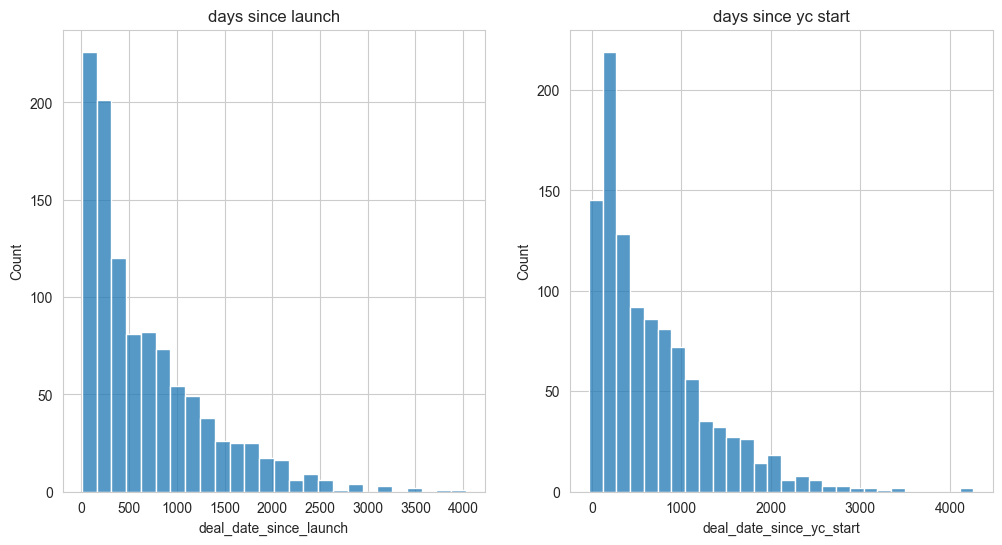

In [425]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.histplot(joined['deal_date_since_launch'])
plt.title('days since launch')

plt.subplot(1,2,2)
sns.histplot(joined['deal_date_since_yc_start'])
plt.title('days since yc start')

In [426]:
joined = joined.loc[joined.deal_date_since_yc_start < 365 * YEARS_TO_CONSIDER, :]

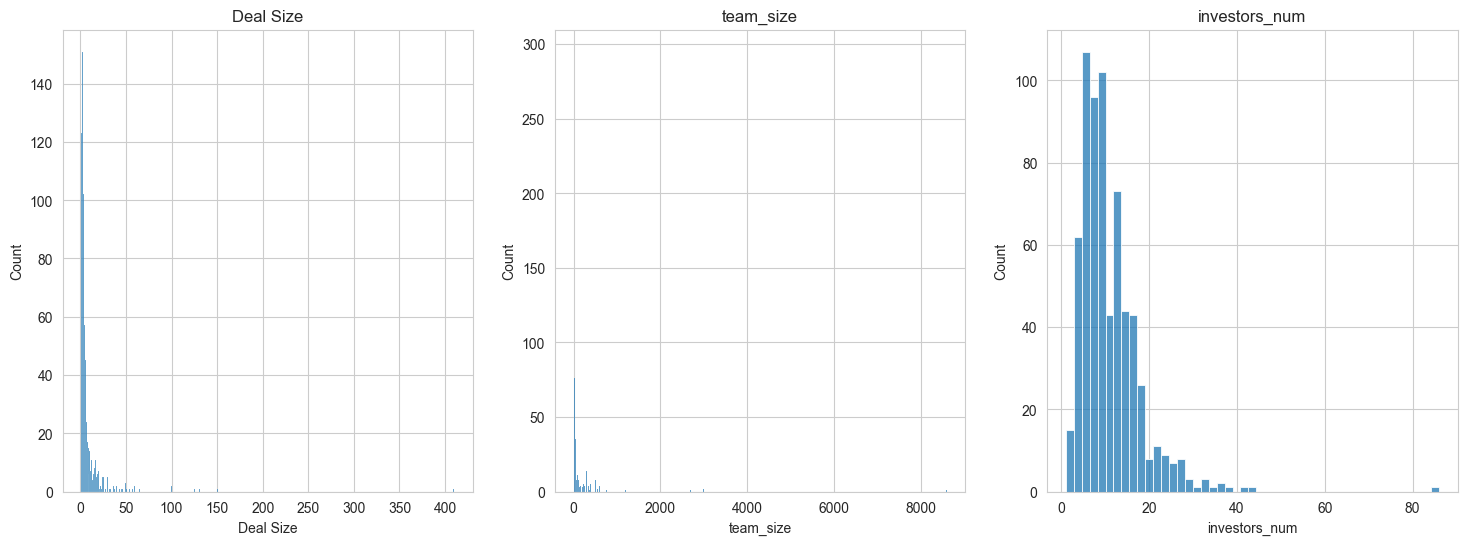

In [427]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
sns.histplot(joined['Deal Size'])
plt.title('Deal Size')

plt.subplot(1,3,2)
sns.histplot(joined['team_size'])
plt.title('team_size');

plt.subplot(1,3,3)
sns.histplot(joined['investors_num'])
plt.title('investors_num');

In [428]:
joined['log_deal_size'] = np.log(joined['Deal Size'])
joined['log_team_size'] = np.log(joined['team_size'])
joined['log_team_size'] = joined['log_team_size'].clip(lower=-1)

/Users/kirill456z/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


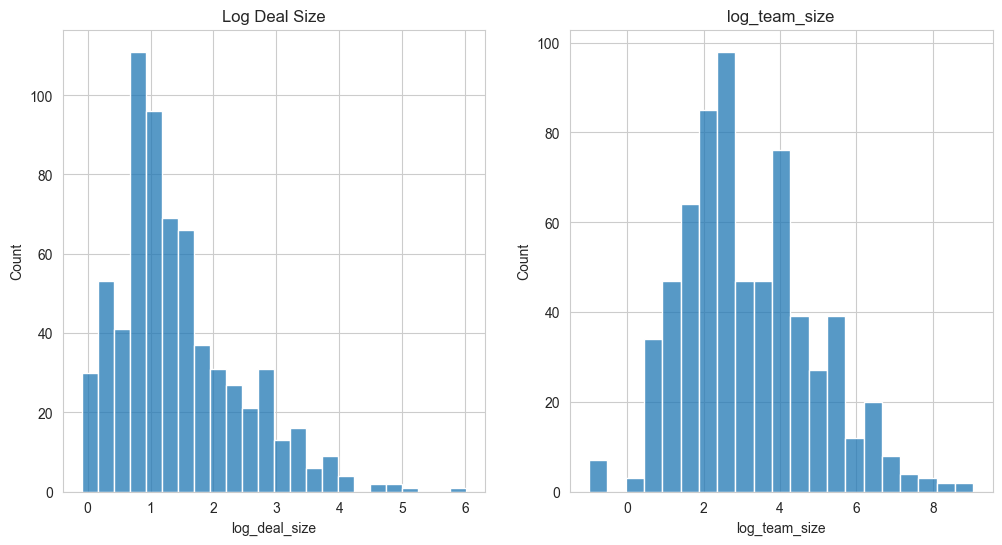

In [429]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.histplot(joined['log_deal_size'])
plt.title('Log Deal Size')

plt.subplot(1,2,2)
sns.histplot(joined['log_team_size'])
plt.title('log_team_size');

In [430]:
pd.options.display.max_rows = 1000
pd.DataFrame(joined.country.value_counts())

,count
country,
USA,352
Remote,191
India,20
United Kingdom,16
Nigeria,15
Canada,9
Singapore,7
nan,7
Colombia,4


In [431]:
selected_countries = ['USA', 'Remote', 'United Kingdom', 'India', 'Canada','Israel', 'Colombia', 'Singapore']
joined = joined.loc[joined.country.isin(selected_countries), :]

In [432]:
pd.options.display.max_rows = 1000
pd.DataFrame(joined.industry.value_counts())

,count
industry,
B2B,283
Consumer,101
Fintech,77
Healthcare,71
Industrials,32
Real Estate and Construction,19
Education,17
Government,3


In [433]:
import json

tags_total = []

for x in joined.tags:
    tags_total += json.loads(x)

unique_tags = list(np.unique(tags_total, return_counts=True)[0])
len(unique_tags)

227

In [434]:
idx = np.argsort(np.unique(tags_total, return_counts=True)[1])
np.unique(tags_total, return_counts=True)[0][idx[:20]]

array(['Payroll', 'Culture', 'Cultivated Meat', 'Cryptocurrency',
       'Maritime', 'Cryogenics', 'Crowdsourcing', 'Mental Health',
       'Customer Service', 'Conversational AI', 'Music',
       'Computational Storage', 'Networks', 'Next-gen Network Security',
       'Edtech', 'Personalization', 'Coding Bootcamps', 'Monitoring',
       'ML', 'Customer Support'], dtype='<U30')

In [435]:
from collections import defaultdict

mapping1 = {
    "Technology and Computing": [
        "3D Printing", "AI", "AIOps", "API", "APIs", "Analytics", "Artificial Intelligence", "Augmented Reality", 
        "Automation", "Autonomous Delivery", "Big Data", "Biometrics", "Cloud Computing", "Cloud Gaming", 
        "Cloud Workload Protection", "Coding Bootcamps", "Collaboration", "Computational Storage", "Computer Vision", 
        "Conversational AI", "Crypto / Web3", "Cryptography", "Cyber Insurance", "Cybersecurity", "DAO", "Data Engineering",
        "Data Labeling", "Data Science", "Data Visualization", "Deep Learning", "DevOps", "DevSecOps", "Developer Tools", 
        "Digital Freight Brokerage", "Drones", "AI-Enhanced Learning", "AI-powered Drug Discovery"
    ],
    "Health and Biotechnology": [
        "Anti-Aging", "Biotech", "Biotechnology", "Cell Therapy", "Cellular Agriculture", "COVID-19", "CRM", 
        "Cultivated Meat", "Diagnostics", "Digital Health", "Drug Delivery", "Drug discovery", "Health Services"
    ],
    "Finance and Business Services": [
        "Banking as a Service", "B2B", "Billing", "Consumer Finance", "DeFi", "Financial Services"
    ],
    "Consumer and Lifestyle": [
        "Advertising", "Apparel", "Beauty", "Booking", "Cashierless Checkout", "Consumer", "Customer Service", 
        "Customer Success", "Customization"
    ],
    "Energy and Environment": [
        "Carbon Capture and Removal", "Climate", "ClimateTech", "Energy", "Environmental Technology"
    ],
    "Advanced Sciences and Materials": [
        "Advanced Materials", "Scientific Advancements", "Material Technologies"
    ],
    "Transportation and Automotive": [
        "Air Taxis", "Airplanes", "Automotive", "Autonomous Trucking", "Transportation Technology", "Vehicles"
    ],
    "Agriculture and Food Technology": [
        "Agriculture", "Agricultural Technology", "Food-related Innovations", "Food Technology"
    ],
    "Media, Entertainment, and Education": [
        "Community", "Creator Economy", "Crowdfunding", "Crowdsourcing", "Education Tools", "Entertainment Technology", 
        "Media Platforms"
    ],
    "Emerging and Miscellaneous Technologies": [
        "Civic Tech", "Construction", "Culture", "Design", "Design Tools", "Documents", "Emerging Fields", "Miscellaneous Technologies"
    ]
}

mapping2 = {
    "Technology and Computing": [
        "E-Commerce", "E-commerce", "Email", "Enterprise", "Enterprise Software", "Generative AI", "GovTech", 
        "Hard Tech", "Hardware", "Health Tech", "Healthcare IT", "HR Tech", "IoT", "Kubernetes", "LegalTech", 
        "Machine Learning", "Metaverse", "Nanotechnology", "Neobank", "Networks", "Next-gen Network Security", 
        "No-code", "Quantum Computing", "Robotic Process Automation", "Robotics"
    ],
    "Health and Biotechnology": [
        "Femtech", "Fertility Tech", "Fitness", "Gene Therapy", "Genomics", "Health & Wellness", "Health Insurance", 
        "Healthcare", "Medical Devices", "Medical Robotics", "Mental Health", "Mental Health Tech", "Nanomedicine"
    ],
    "Finance and Business Services": [
        "FinOps", "Finance", "Fintech", "Fraud Detection", "Fraud Prevention", "Insurance", "Investing", "Legal", 
        "Lending", "Payments", "Payroll", "Personalization", "Procurement", "Regtech"
    ],
    "Consumer and Lifestyle": [
        "Fashion", "Food", "Food & Beverage", "Food Service Robots & Machines", "Furniture", "Gaming", "Grocery", 
        "Housing", "Kids", "Legal", "Marketing", "Marketplace", "Media", "Music", "Podcasts", "Privacy", "Productivity", 
        "Real Estate", "Remote", "Remote Work", "Restaurant Tech", "Retail", "Retail Tech"
    ],
    "Energy and Environment": [
        "Energy", "Energy Storage", "Hydrogen Energy", "Renewable Energy"
    ],
    "Advanced Sciences and Materials": [
        "Advanced Sciences", "Materials", "Microfluidics", "Nanosensors"
    ],
    "Transportation and Automotive": [
        "Electric Vehicles", "Logistics", "Maritime", "Transportation", "Automotive"
    ],
    "Agriculture and Food Technology": [
        "Agriculture", "Food Tech", "Ghost Kitchens"
    ],
    "Media, Entertainment, and Education": [
        "Education", "Entertainment", "Media", "Messaging", "Podcasts"
    ],
    "Emerging and Miscellaneous Technologies": [
        "Civic Tech", "Construction", "Culture", "Design", "Documents", "Emerging Fields", "Identity", "Immigration", 
        "Income Share Agreements", "India", "Industrial", "Industrial Workplace Safety", "Infrastructure", "Latin America", 
        "Live", "Manufacturing", "Monitoring", "NFT", "NLP", "Navigation", "Oncology", "Open Source", "Primary Care", 
        "Privacy", "Proptech", "Psychedelics", "Recruiting", "Referrals", "Reinforcement Learning", "Remittances", 
        "Restaurant Tech", "Retail Tech", "Nanotechnology"
    ]
}

mapping3 = {
    "Technology and Computing": [
        "SEO", "SMB", "SMS", "SaaS", "Sales", "Sales Enablement", "Satellites", "Scheduling", "Security", 
        "Security Orchestration, Automation and Response (SOAR)", "Social", "Social Media", "Social Network", 
        "Speech Recognition", "Subscriptions", "Supply Chain", "Synthetic Biology", "Telecommunications", 
        "Video", "Virtual Reality", "Warehouse Management Tech", "Workflow Automation", "eLearning"
    ],
    "Health and Biotechnology": [
        "Sleep Tech", "Sports Tech", "Therapeutics", "Women's Health"
    ],
    "Finance and Business Services": [
        "Trading"
    ],
    "Consumer and Lifestyle": [
        "Sustainable Fashion", "Travel", "eSports"
    ],
    "Energy and Environment": [
        "Solar Power", "Sustainable Agriculture"
    ],
    "Advanced Sciences and Materials": [
        "Space Exploration", "Synthetic Biology"
    ],
    "Transportation and Automotive": [
        "Transportation"
    ],
    "Agriculture and Food Technology": [
        "Sustainable Agriculture", "Vertical Farming"
    ],
    "Media, Entertainment, and Education": [
        "Social Media", "Social Network", "Sports Tech", "Video", "eLearning", "eSports"
    ],
    "Emerging and Miscellaneous Technologies": [
        "Emerging Technologies", "Innovative Technologies"
    ]
}

mapping_final = defaultdict(list)
for cur_map in [mapping1, mapping2, mapping3]:
    for k, v in cur_map.items():
        mapping_final[k] += v

tag_to_cat = defaultdict(list)
for category, tags in mapping_final.items():
    for tag in tags:
        tag_to_cat[tag].append(category)

tag_to_cat

defaultdict(list,
            {'3D Printing': ['Technology and Computing'],
             'AI': ['Technology and Computing'],
             'AIOps': ['Technology and Computing'],
             'API': ['Technology and Computing'],
             'APIs': ['Technology and Computing'],
             'Analytics': ['Technology and Computing'],
             'Artificial Intelligence': ['Technology and Computing'],
             'Augmented Reality': ['Technology and Computing'],
             'Automation': ['Technology and Computing'],
             'Autonomous Delivery': ['Technology and Computing'],
             'Big Data': ['Technology and Computing'],
             'Biometrics': ['Technology and Computing'],
             'Cloud Computing': ['Technology and Computing'],
             'Cloud Gaming': ['Technology and Computing'],
             'Cloud Workload Protection': ['Technology and Computing'],
             'Coding Bootcamps': ['Technology and Computing'],
             'Collaboration': ['Technolog

In [436]:
def convert_tag(tags):
    tags_list = json.loads(tags)
    res = []
    for tag in tags_list:
        res += tag_to_cat[tag]
    return list(np.unique(res))

joined['category'] = joined.tags.map(convert_tag)

### Data preparation

In [437]:
def logit(x):
    return np.log(x / (1-x))

joined['% Acquired'] = joined['% Acquired'].map(logit)

In [438]:
train_columns = ['country', 'log_team_size', 'industry', 'category', 'deal_date_since_launch', 'deal_date_days', 'Deal Type', 'investors_num']
target_columns = ['% Acquired', 'log_deal_size']

In [439]:
selected_data = joined.loc[:, train_columns + target_columns]
selected_data = selected_data.dropna(axis=0)
selected_data = selected_data.loc[selected_data.country != 'nan', :]

pd.options.display.max_rows = 30
selected_data[200:].head(10)

,country,log_team_size,industry,category,deal_date_since_launch,deal_date_days,Deal Type,investors_num,% Acquired,log_deal_size
891,USA,5.298317,Education,"[Media, Entertainment, and Education]",186,2337,Seed Round,17,-0.993101,0.792993
899,USA,5.010635,Consumer,[Consumer and Lifestyle],428,2579,Early Stage VC,13,-1.557539,2.856470
901,USA,2.397895,B2B,"[Consumer and Lifestyle, Technology and Comput...",196,2351,Seed Round,3,-0.955401,1.609438
904,USA,3.931826,B2B,[],596,2747,Early Stage VC,28,-0.707733,3.030134
905,USA,4.219508,B2B,"[Consumer and Lifestyle, Finance and Business ...",81,2232,Early Stage VC,3,-1.213400,1.124930
916,Remote,8.718009,Fintech,[Technology and Computing],334,1920,Early Stage VC,22,-1.019627,1.809927
921,Remote,5.703782,Fintech,"[Consumer and Lifestyle, Finance and Business ...",178,1764,Seed Round,6,-0.734537,0.875469
930,Remote,1.609438,Fintech,"[Consumer and Lifestyle, Finance and Business ...",130,1716,Early Stage VC,38,-0.836369,1.871802
933,USA,3.931826,B2B,"[Consumer and Lifestyle, Media, Entertainment,...",185,1771,Seed Round,41,-1.131415,1.964311
935,USA,2.397895,B2B,"[Consumer and Lifestyle, Finance and Business ...",696,2282,Early Stage VC,4,-0.864021,1.193922


In [440]:
categories = list(mapping_final.keys())

def check_if_cat_factory(category):
    def check_if_cat(x):
        return 1 if category in x else 0
    return check_if_cat

for category in categories:
    selected_data[category] = selected_data.category.map(check_if_cat_factory(category))

In [441]:
from sklearn.preprocessing import OneHotEncoder

ohc = OneHotEncoder(sparse_output=False)
X_cat = ohc.fit_transform(selected_data.loc[:, ['country', 'industry', 'Deal Type']])
features = ohc.get_feature_names_out()

for i, feature_name in enumerate(features):
    selected_data[feature_name] = X_cat[:, i]

In [442]:
import re

selected_data = selected_data.drop(['category', 'industry', 'country', 'Deal Type'], axis=1)

selected_data = selected_data.rename(lambda x : re.sub(' |/|,|%', '_',x), axis=1)

### Training

In [443]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(selected_data, test_size=0.1)

In [444]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['log_team_size', 'deal_date_since_launch', 'deal_date_days', 'investors_num']

scaler = StandardScaler()
train_only_scaled = scaler.fit_transform(train.loc[:, scale_cols])
train_only_scaled = pd.DataFrame(train_only_scaled, 
                                index=train.index, 
                                columns=scale_cols)
train_other = train.drop(scale_cols, axis = 1)
train_scaled = train_only_scaled.merge(train_other, left_index=True, right_index=True)

test_only_scaled = scaler.fit_transform(test.loc[:, scale_cols])
test_only_scaled = pd.DataFrame(test_only_scaled, 
                                index=test.index, 
                                columns=scale_cols)
test_other = test.drop(scale_cols, axis = 1)
test_scaled = test_only_scaled.merge(test_other, left_index=True, right_index=True)

In [445]:
from sklearn.linear_model import Ridge

X_train = train_scaled.drop(['log_deal_size', '__Acquired'], axis = 1)
Y_train = train_scaled.loc[:, ['log_deal_size']]
Y_train_perc = train_scaled.loc[:, ['__Acquired']]

X_test = test_scaled.drop(['log_deal_size', '__Acquired'], axis = 1)
Y_test = test_scaled.loc[:, ['log_deal_size']]
Y_test_perc = test_scaled.loc[:, ['__Acquired']]

## Statmodels
### Deal Size

In [446]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

result = smf.ols(formula="log_deal_size ~ + " + "+".join(X_train.columns), data=train_scaled).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_deal_size   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     7.345
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           5.14e-20
Time:                        21:32:49   Log-Likelihood:                -268.11
No. Observations:                 241   AIC:                             600.2
Df Residuals:                     209   BIC:                             711.7
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   1.1016      0.183      6.022      0.000       0.741       1.462
log_team_size                               0.2186      0.059      3.700      0.000       0.102       0.335
deal_date_since_launch                      0.2664      0.055      4.831      0.000       0.158       0.375
deal_date_days                              0.3165      0.061      5.183      0.000       0.196       0.437
investors_num                               0.1223      0.056      2.169      0.031       0.011       0.233
Technology_and_Computing                   -0.0124      0.131     -0.095      0.924      -0.270       0.245
Health_and_Biotechnology                   -0.2229      0.257     -0.867      0.387      -0.730       0.284
Finance_and_Business_Services               0.1122      0.149      0.751      0.454      -0.182       0.407
Consumer_and_Lifestyle                     -0.0042      0.146     -0.028      0.977      -0.293       0.284
Energy_and_Environment                      0.0776      0.346      0.224      0.823      -0.605       0.760
Advanced_Sciences_and_Materials             0.1391      0.348      0.399      0.690      -0.548       0.826
Transportation_and_Automotive               0.1268      0.251      0.505      0.614      -0.368       0.622
Agriculture_and_Food_Technology            -0.2896      0.417     -0.694      0.488      -1.112       0.533
Media__Entertainment__and_Education        -0.2288      0.203     -1.125      0.262      -0.630       0.172
Emerging_and_Miscellaneous_Technologies    -0.0808      0.174     -0.465      0.642      -0.424       0.262
country_Canada                              0.9333      0.454      2.055      0.041       0.038       1.829
country_Colombia                           -0.7667      0.728     -1.054      0.293      -2.201       0.668
country_India                               0.0315      0.417      0.075      0.940      -0.791       0.853
country_Israel                             -0.1404      0.545     -0.258      0.797      -1.215       0.934
country_Remote                              0.2946      0.177      1.661      0.098      -0.055       0.644
country_Singapore                           0.0407      0.538      0.076      0.940      -1.021       1.102
country_USA                                 0.3996      0.171      2.333      0.021       0.062       0.737
country_United_Kingdom                      0.3091      0.381      0.810      0.419      -0.443       1.061
industry_B2B                                0.1658      0.148      1.123      0.263      -0.125       0.457
industry_Consumer                           0.1373      0.167      0.820      0.413      -0.193       0.467
industry_Education                         -0.0032      0.3

In [447]:
predictions = result.get_prediction(test_scaled)

In [448]:
from sklearn.metrics import mean_absolute_error

print(f"msa: {mean_absolute_error(predictions.predicted, Y_test)}")
print(f"average_msa: {mean_absolute_error(np.mean(Y_test) * np.ones(Y_test.shape), Y_test)}")

msa: 0.4202618636835181
average_msa: 0.8013348522782181


In [449]:
from sklearn.metrics import mean_absolute_error

print(f"msa real: {mean_absolute_error(np.exp(predictions.predicted), np.exp(Y_test))}")
print(f"average_msa real: {mean_absolute_error(np.exp(np.mean(Y_test) * np.ones(Y_test.shape)), np.exp(Y_test))}")

msa real: 3.156342213928024
average_msa real: 6.448327090686457


### % Acquired

In [450]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

result_perc = smf.ols(formula="__Acquired ~ + " + "+".join(X_train.columns), data=train).fit()
result_perc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             __Acquired   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1.870
Date:                Thu, 07 Dec 2023   Prob (F-statistic):            0.00554
Time:                        21:32:49   Log-Likelihood:                -233.63
No. Observations:                 241   AIC:                             531.3
Df Residuals:                     209   BIC:                             642.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -0.9956      0.231     -4.307      0.000      -1.451      -0.540
log_team_size                               0.0049      0.031      0.160      0.873      -0.056       0.065
deal_date_since_launch                      0.0002      0.000      0.863      0.389      -0.000       0.001
deal_date_days                          -4.715e-05   5.22e-05     -0.903      0.368      -0.000    5.58e-05
investors_num                               0.0024      0.006      0.431      0.667      -0.009       0.013
Technology_and_Computing                    0.2524      0.113      2.230      0.027       0.029       0.475
Health_and_Biotechnology                   -0.0739      0.223     -0.331      0.741      -0.513       0.366
Finance_and_Business_Services              -0.0465      0.130     -0.359      0.720      -0.302       0.209
Consumer_and_Lifestyle                      0.1584      0.127      1.248      0.213      -0.092       0.409
Energy_and_Environment                      1.0017      0.300      3.340      0.001       0.410       1.593
Advanced_Sciences_and_Materials            -0.2129      0.302     -0.705      0.482      -0.808       0.383
Transportation_and_Automotive               0.1010      0.218      0.464      0.643      -0.328       0.530
Agriculture_and_Food_Technology             0.8715      0.361      2.411      0.017       0.159       1.584
Media__Entertainment__and_Education         0.0260      0.176      0.148      0.883      -0.321       0.373
Emerging_and_Miscellaneous_Technologies    -0.1796      0.151     -1.192      0.235      -0.477       0.117
country_Canada                             -0.4794      0.395     -1.212      0.227      -1.259       0.300
country_Colombia                           -0.8682      0.631     -1.377      0.170      -2.111       0.375
country_India                               0.4120      0.365      1.129      0.260      -0.307       1.131
country_Israel                              0.2682      0.471      0.569      0.570      -0.661       1.197
country_Remote                             -0.0701      0.156     -0.450      0.653      -0.377       0.237
country_Singapore                           0.2475      0.467      0.530      0.597      -0.674       1.169
country_USA                                -0.1187      0.148     -0.802      0.423      -0.410       0.173
country_United_Kingdom                     -0.3869      0.330     -1.173      0.242      -1.037       0.263
industry_B2B                               -0.3469      0.133     -2.602      0.010      -0.610      -0.084
industry_Consumer                          -0.1186      0.146     -0.809      0.419      -0.407       0.170
industry_Education                         -0.1488      0.3

In [451]:
from sklearn.metrics import mean_absolute_error

predictions_perc = result_perc.get_prediction(test)

print(f"msa: {mean_absolute_error(predictions_perc.predicted, Y_test_perc)}")
print(f"average_msa: {mean_absolute_error(np.mean(Y_test_perc) * np.ones(Y_test_perc.shape), Y_test_perc)}")

msa: 0.4949306199862881
average_msa: 0.44035339323460565


Doesn't work

### Inference

In [521]:
from tabulate import tabulate

def predict(df_for_predict, df, name):
    predictions = result.get_prediction(df_for_predict)
    predicted = predictions.predicted
    interv = predictions.conf_int()
    rows = []
    rows.append(["Name", name])
    for x, v in df.iterrows():
        for k, val in v.items():
            if val == 1:
                if k.startswith('country_'):
                    rows.append(['Country', str(k[len('country_'):])])
                elif k.startswith('industry_'):
                    rows.append(['Industry', str(k[len('industry_'):])])
                elif k.startswith('Deal_Type_'):
                    rows.append(['Deal Type', str(re.sub('_', ' ', k[len('Deal_Type_'):]))])
                else:
                    rows.append(['Category',str(re.sub('_', ' ', k))])

    print(f"Company info:\n")
    rows.append(["Team size", int(np.exp(df['log_team_size'].item()))])
    rows.append(["Number of investors", str(df['investors_num'].item())])
    rows.append(["Days since launch",str(df['deal_date_since_launch'].item())])
    print(tabulate(rows, tablefmt='fancy_grid'))
    print("")

    lb, rb, m = np.exp(interv[0][0]) *1e6, np.exp(interv[0][1]) * 1e6, np.exp(predicted[0]) * 1e6
    print(f"Predicted deal size between {lb - (lb % 10000) :,.0f}$ and {rb - (rb % 10000) :,.0f}$ with 0.95 confidence")
    print(f"Mean: {m - (m % 10000) :,.0f}$")

In [522]:
index = 0
name = joined.loc[joined.index == test.index[index], :].iloc[0].Companies
predict(test_scaled.iloc[[index]] ,test.iloc[[index]], name)

Company info:

╒═════════════════════╤═════════════════════════════════════════╕
│ Name                │ Airbyte                                 │
├─────────────────────┼─────────────────────────────────────────┤
│ Category            │ Technology and Computing                │
├─────────────────────┼─────────────────────────────────────────┤
│ Category            │ Emerging and Miscellaneous Technologies │
├─────────────────────┼─────────────────────────────────────────┤
│ Country             │ USA                                     │
├─────────────────────┼─────────────────────────────────────────┤
│ Industry            │ B2B                                     │
├─────────────────────┼─────────────────────────────────────────┤
│ Deal Type           │ Seed Round                              │
├─────────────────────┼─────────────────────────────────────────┤
│ Team size           │ 110                                     │
├─────────────────────┼──────────────────────────────────────

predict a deal right after YC. Predict number of deals in two years after YC. Only look at deals in a range 2 years or 12 months after yc.   
Add some fields to descriptoin